In [5]:
# Load datafiles and libraries
import sys
import os
import importlib
sys.path.append(os.path.abspath('..'))
import Analysis
importlib.reload(Analysis)
import pandas as pd
import glob

pd.options.mode.chained_assignment = None

In [28]:
print('Descriptives of datapoints of Polar H10 D6B33A2A, Polar Sense D833AF2E, Polar Vantage V3 D733F724, Fitbit Charge 2 of only 1 testsubject:')

subjects_df = pd.read_csv('subject.csv')

directory = './data'
pattern = os.path.join(directory, '*.gz')
files = glob.glob(pattern)

df = Analysis.load_files_into_df(files)

average_HR_df = Analysis.make_mean_HR_10sec(df)
activity_average_HR_df = Analysis.filter_on_activity(average_HR_df, subjects_df)

df = Analysis.load_files_into_df(files)

average_HR_df = Analysis.make_mean_HR_10sec(df)
activity_average_HR_df = Analysis.filter_on_activity(average_HR_df, subjects_df)

common_timepoints_average_HR_activity_df = Analysis.filter_common_timepoints_all_devices(activity_average_HR_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724', 'Fitbit Charge 2')

Descriptives of datapoints of Polar H10 D6B33A2A, Polar Sense D833AF2E, Polar Vantage V3 D733F724, Fitbit Charge 2 of only 1 testsubject:
Before filtering on common timepoints
Device: Fitbit Charge 2
Total records (without Unknown): 104
Resting: 24
Exercise: 46
Recovery: 34
Unknown: 8

Device: Polar H10 D6B33A2A
Total records (without Unknown): 876
Resting: 300
Exercise: 296
Recovery: 280
Unknown: 60

Device: Polar Sense D833AF2E
Total records (without Unknown): 715
Resting: 275
Exercise: 204
Recovery: 236
Unknown: 58

Device: Polar Vantage V3 D733F724
Total records (without Unknown): 869
Resting: 298
Exercise: 294
Recovery: 277
Unknown: 60

After filtering on common timepoints
Device: Fitbit Charge 2
Total records: 101
Resting: 24
Exercise: 45
Recovery: 32
Unknown: 0

Device: Polar H10 D6B33A2A
Total records: 101
Resting: 24
Exercise: 45
Recovery: 32
Unknown: 0

Device: Polar Sense D833AF2E
Total records: 79
Resting: 23
Exercise: 32
Recovery: 24
Unknown: 0

Device: Polar Vantage V3 D7

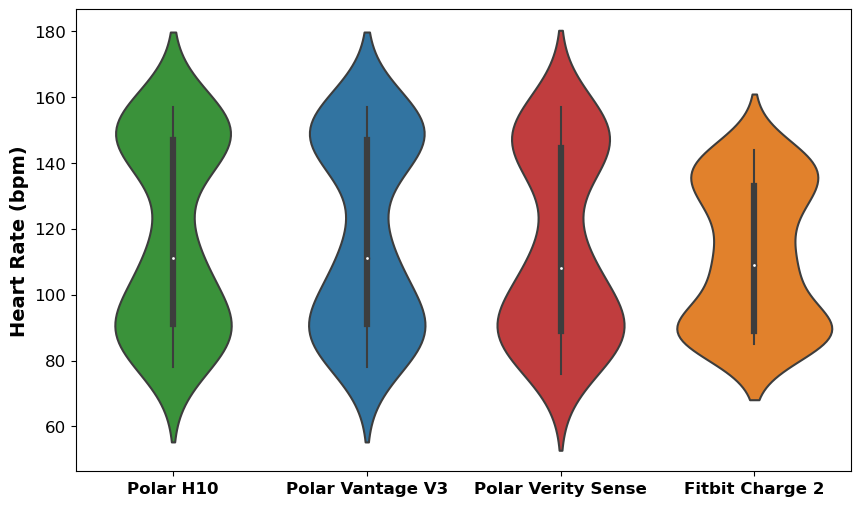

In [16]:
Analysis.make_plot_means(common_timepoints_average_HR_activity_df, subjects_df)

5f672ff8-5950-48a8-8b5b-b385a0add8f2 2024-06-17 13:35:00 2024-06-17 13:50:00


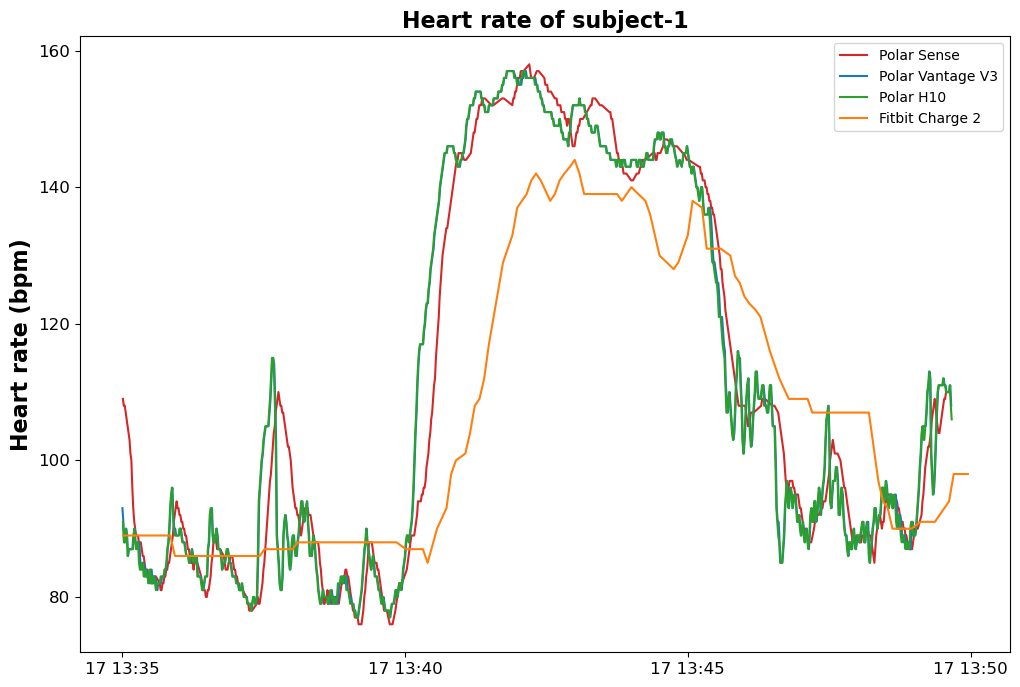

In [10]:
for subject in common_timepoints_average_HR_activity_df['key.userId'].unique():
    
    subject_start = Analysis.return_subject_timestamp(common_timepoints_average_HR_activity_df, subject, 'resting_start')
    subject_end = Analysis.return_subject_timestamp(common_timepoints_average_HR_activity_df, subject, 'recovery_end')

    print(subject, subject_start, subject_end)
    Analysis.plot_all_devices(df, subject_start, subject_end)

Bland-Altman plots


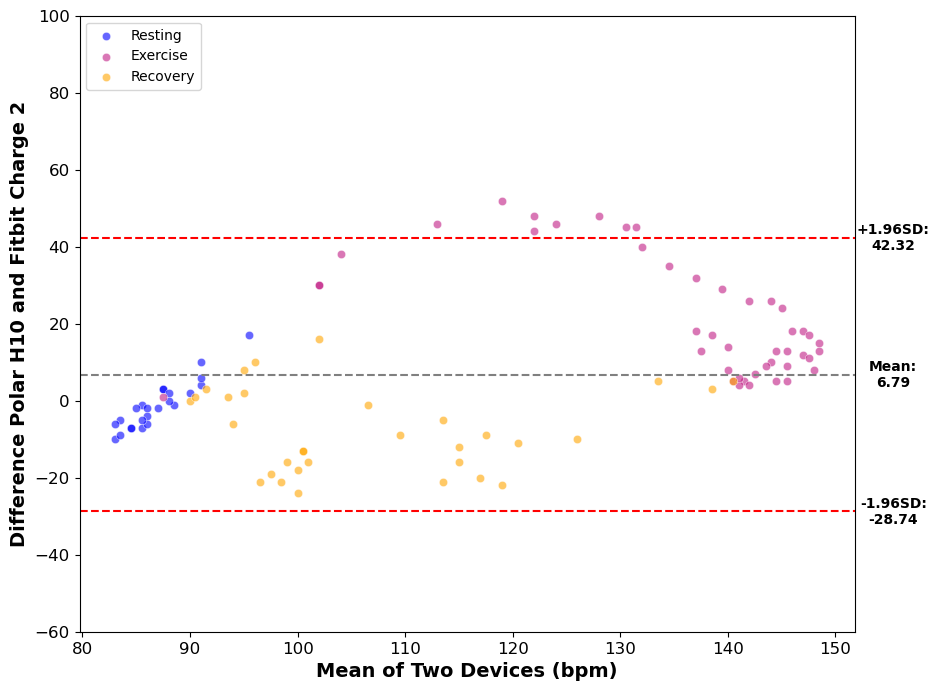

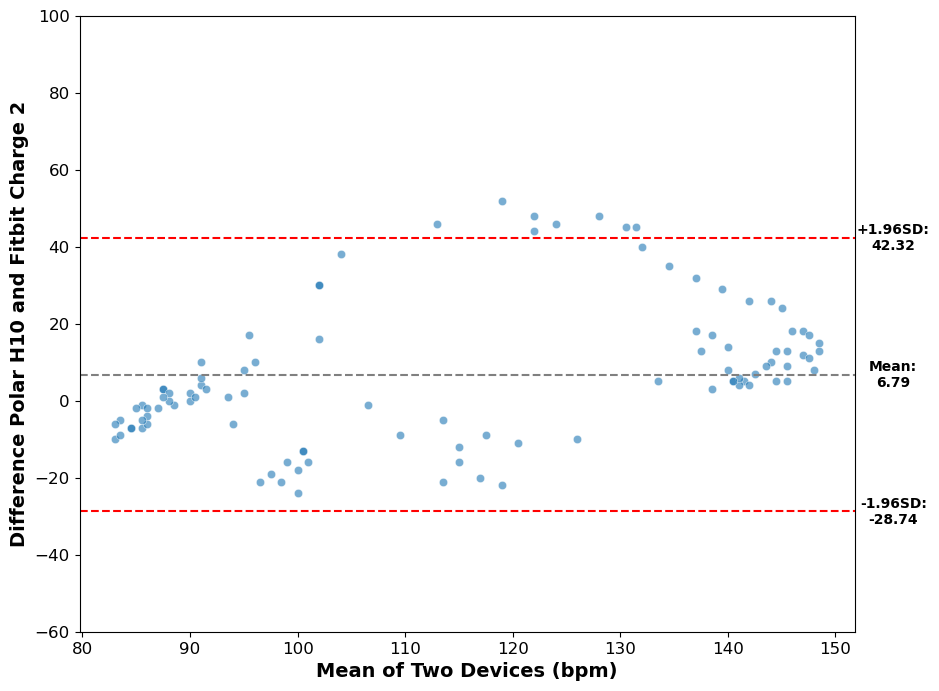

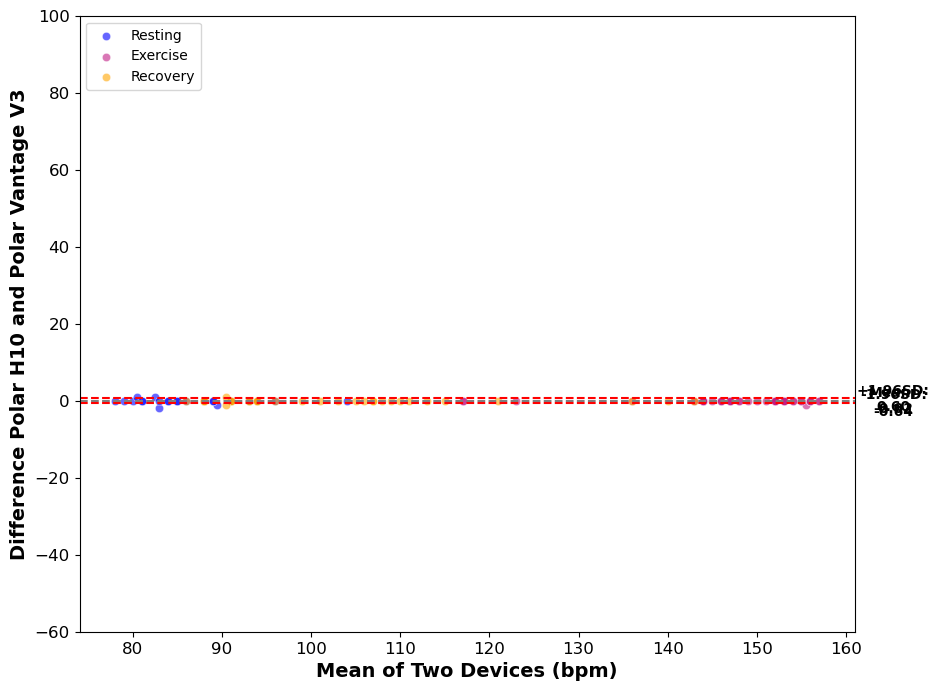

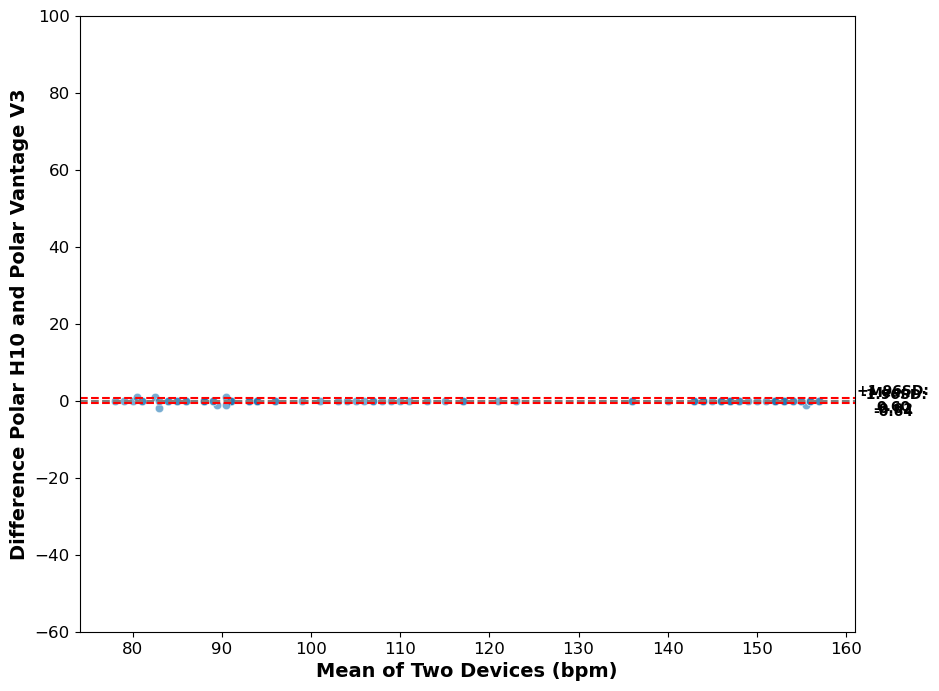

In [12]:
print('Bland-Altman plots')

activity_BA_data_fitbit = Analysis.data_for_bland_altman(common_timepoints_average_HR_activity_df, subjects_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2')
Analysis.bland_altman_plot_activity(activity_BA_data_fitbit, 'Polar H10 D6B33A2A', 'Fitbit Charge 2')
subject_BA_data_fitbit = Analysis.data_for_bland_altman_subject(common_timepoints_average_HR_activity_df, subjects_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2')
Analysis.bland_altman_plot_subject(subject_BA_data_fitbit, 'Polar H10 D6B33A2A', 'Fitbit Charge 2')

activity_BA_data_V3 = Analysis.data_for_bland_altman(common_timepoints_average_HR_activity_df, subjects_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724')
Analysis.bland_altman_plot_activity(activity_BA_data_V3, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724')
subject_BA_data_V3 = Analysis.data_for_bland_altman_subject(common_timepoints_average_HR_activity_df, subjects_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724')
Analysis.bland_altman_plot_subject(subject_BA_data_V3, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724')

In [22]:
print('Statistical tests:')

Analysis.shapiro_wilk_test(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2', 'Polar Vantage V3 D733F724', subjects_df)
print("")

print("Lin’s Concordance Correlation Coefficient")
print(Analysis.ccc_per_devicepair(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724', subjects_df))
print(Analysis.ccc_per_devicepair(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2', subjects_df))

print("RMSE")
print(Analysis.RMSE(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724', subjects_df))
print(Analysis.RMSE(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2', subjects_df))

print("NRMSE")
print(Analysis.NRMSE(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Polar Vantage V3 D733F724', subjects_df))
print(Analysis.NRMSE(common_timepoints_average_HR_activity_df, 'Polar H10 D6B33A2A', 'Fitbit Charge 2', subjects_df))


Statistical tests:
Polar H10 D6B33A2A Shapiro-Wilk Test Statistic: 0.8468335866928101 0.9259229898452759 0.6719623804092407 0.8606466054916382
p-value: 8.009290120014612e-09 0.0790584534406662 9.333066763872466e-09 0.000711754197254777
Polar H10 D6B33A2A is not normally distributed (full)

Fitbit Charge 2 Shapiro-Wilk Test Statistic: 0.861138105392456 0.8375530242919922 0.8095948696136475 0.932612955570221
p-value: 2.7759902820889693e-08 0.0012954211561009288 3.891690084856236e-06 0.04633162543177605
Fitbit Charge 2 is not normally distributed (full)

Polar Vantage V3 D733F724 Shapiro-Wilk Test Statistic: 0.8474313020706177 0.9317711591720581 0.6735517978668213 0.8606466054916382
p-value: 8.423757691389255e-09 0.10679557919502258 9.905936515508529e-09 0.000711754197254777
Polar Vantage V3 D733F724 is not normally distributed (full)

Lin’s Concordance Correlation Coefficient
concordance_correlation_coefficient results for  Polar H10 D6B33A2A Polar Vantage V3 D733F724
All data: 0.9999387

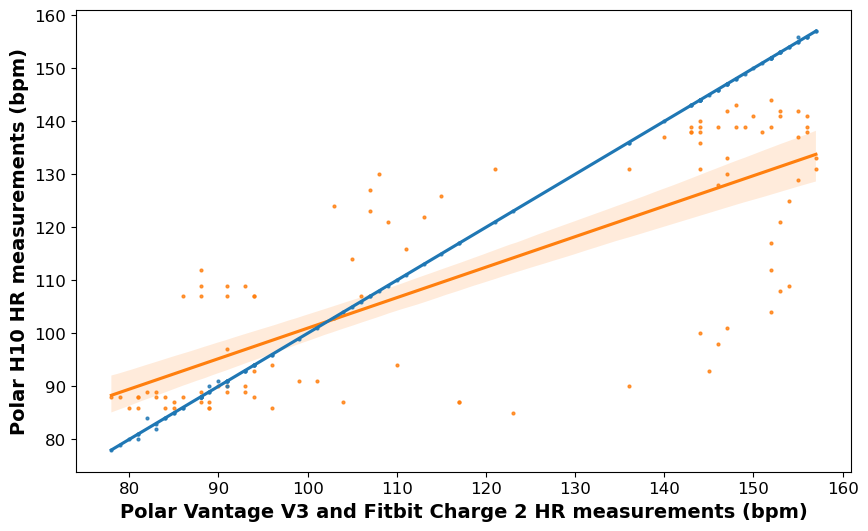

In [25]:
Analysis.make_scattterplot_H10(common_timepoints_average_HR_activity_df, 'Full', subjects_df)

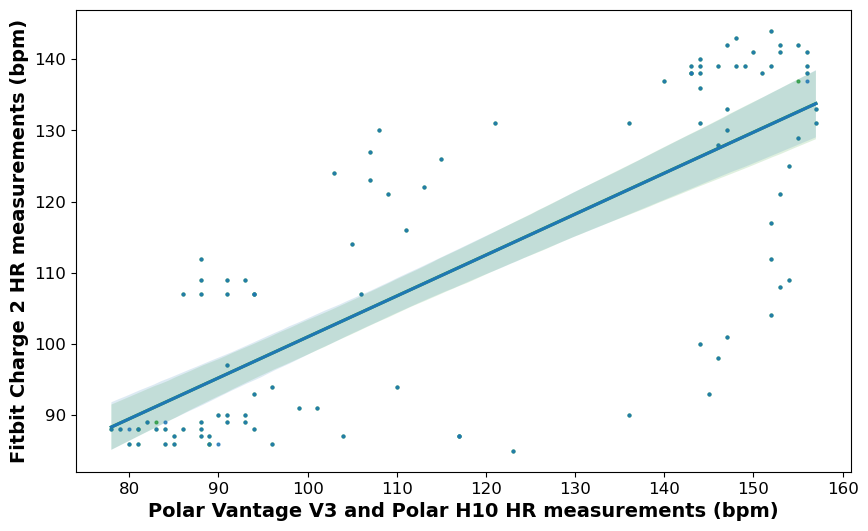

In [26]:

Analysis.make_scatterplot_fitbit(common_timepoints_average_HR_activity_df, subjects_df)
